In [1]:
import pandas as pd

df = pd.read_csv("../data/Roadway_Centerline_2.csv")
df

,FID,PARENT,STATUS,LENGTH,GREENBOOK,HIGHWAY,GIS,JURISDICTI,QC_NOTE,FUN_CLASS,GRID,MIN_STATIO,MAX_STATIO,COUNCIL,DISTRICT1,District,NO_LABEL,RTE_SYS_ED,Shape__Length
0,1,ENNIS1,,392,Ennis Rd,ENNIS RD,1,PUBLIC WAY,,LO,0,0,392,7,2-02,2-02,0,,161.784164
1,2,COMMO4,,500,Common St,COMMON ST,1,PUBLIC WAY,,LO,0,0,500,1,1-1A,1-1A,0,,206.470292
2,3,ENTER1,,1132,Enterprise St,ENTERPRISE ST,1,PUBLIC WAY,,LO,0,0,1132,2,3-03,3-03,0,,466.764571
3,4,HARLE1,,612,Harlem St,HARLEM ST,1,PUBLIC WAY,,LO,0,0,612,4,3-03,3-03,0,,252.107495
4,5,COMMO5,,29000,Commonwealth Ave,COMMONWEALTH AV EB,1,PUBLIC WAY,,AR,0,0,29000,9,"1-10A, 1-1C, 2-04","1-10A, 1-1C, 2-04",1,,11949.902945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,5073,SENAT1,,1897,SENATOR BOLLING CIRCLE,SENATOR BOLLING CIR,0,PRIVATE WAY,1,LO,,0,1897,7,3-07,3-07,0,,781.986769
5073,5074,MEDAL1,,1483,Medallion Av,MEDALLION AV,0,PUBLIC WAY/PRIVATE WAY,,LO,,0,1483,2,3-05,3-05,0,04-30-22-SEGMENT ADDED,612.254543
5074,5075,IRON1,,327,Iron St,IRON ST,0,PRIVATE WAY,,LO,,0,327,2,3-05,3-05,0,04-30-22-SEGMENT ADDED,134.910319
5075,5076,SEAFO1,,1552,Seafood Way,SEAFOOD WY,0,PRIVATE WAY,,LO,,0,1552,2,3-05,3-05,0,04-30-2022-SEGMENT ADDED,640.920960


In [2]:
def clean_function(df):
    df['FUN_CLASS'] = df['FUN_CLASS'].str.strip()
    return df

This dataset contains road centerlines data in Boston. A roadway centerline is a vector line data that represents the geographic center of a roadway between road shoulders. It can be used to encode road characteristics, such as road name, type, speed limit, etc12. It can also be used for linear referencing systems (LRS), which allow locating features along a route using distance measures. This dataset shows which roads are public or private, and what their functions are. It also shows which districts they cross. This could help with mapping. To get accessibility scores for each road, we need more data than this dataset, but some of its features might be helpful with other datasets.

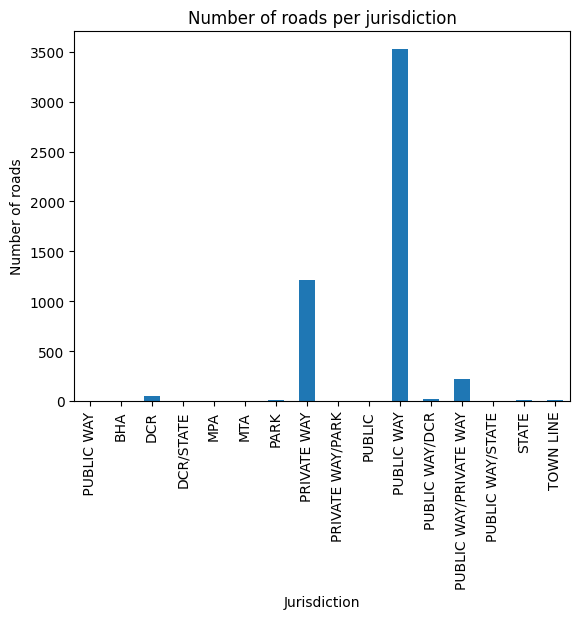

In [3]:
import matplotlib.pyplot as plt
road_jurisdiction = df.groupby("JURISDICTI")['FID'].count()
road_jurisdiction.plot.bar()
road_jurisdiction
plt.xlabel("Jurisdiction")
plt.ylabel("Number of roads")
plt.title("Number of roads per jurisdiction")
plt.savefig("../graphs/roadway_centerline/number_of_roads_per_jurisdiction.pdf")
plt.show()

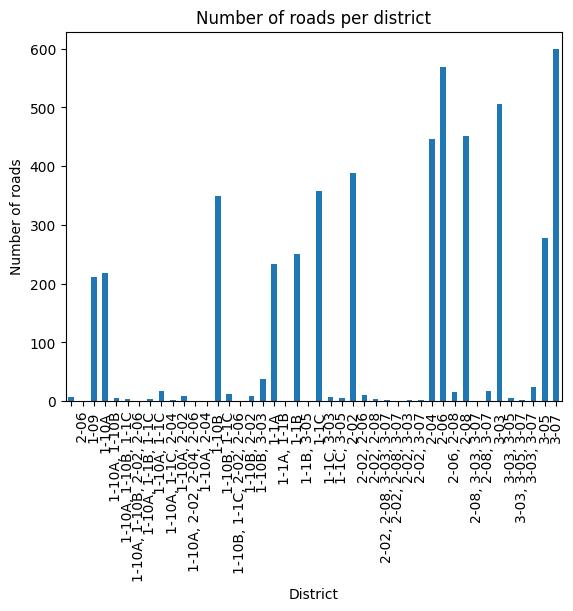

In [4]:
road_district = df.groupby("District")['FID'].count()
road_district.plot.bar()
road_district
plt.xlabel("District")
plt.ylabel("Number of roads")
plt.title("Number of roads per district")
plt.savefig("../graphs/roadway_centerline/number_of_roads_per_district.pdf")
plt.show()

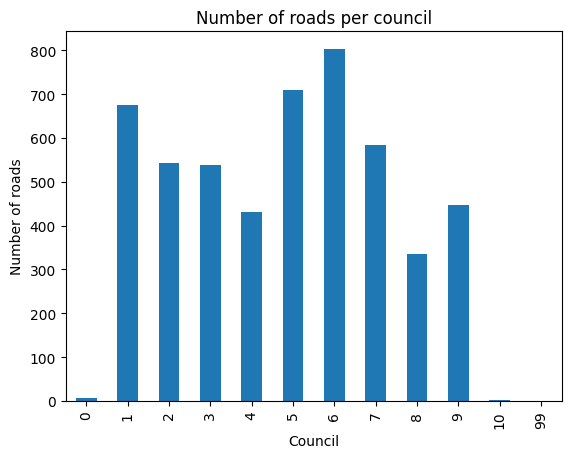

In [5]:
road_council = df.groupby("COUNCIL")['FID'].count()
road_council.plot.bar()
road_council
plt.xlabel("Council")
plt.ylabel("Number of roads")
plt.title("Number of roads per council")
plt.savefig("../graphs/roadway_centerline/number_of_roads_per_council.pdf")
plt.show()

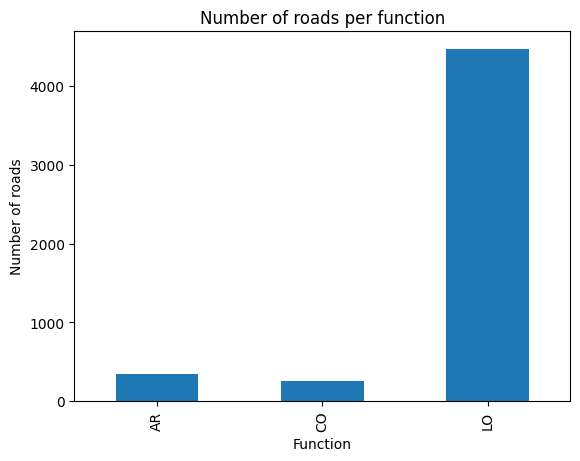

In [6]:
df = clean_function(df) 
df = df[df['FUN_CLASS']!=""]
road_function = df.groupby("FUN_CLASS")['FID'].count()
road_function.plot.bar()
road_function
plt.xlabel("Function")
plt.ylabel("Number of roads")
plt.title("Number of roads per function")
plt.savefig("../graphs/roadway_centerline/number_of_roads_per_function.pdf")
plt.show()

The charts show many unclear cases in this dataset. For instance, the first chart has several similar juridiction names like PUBLIC WAY, PUBLIC WAY/DCR PUBLIC, etc. We should ask the client if this is intentional or if we should clean the data somehow.

